In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [25]:
 
 

def closest_previous_date(target_date, date_series):
	return date_series[date_series <= target_date].max()

def calculate_return(df, months):
	results = []
	for index, row in df.iterrows():
		start_date = row['date']
		target_date = start_date + pd.DateOffset(months=months)
		closest_date = closest_previous_date(target_date, df['date'])

		if pd.isna(closest_date):
			results.append(None)
			continue

		start_close = row['close']
		end_close = df.loc[df['date'] == closest_date, 'close'].values[0]
		period_return = (end_close / start_close) - 1
		results.append(period_return)

	return results


def calculate_annualized_return(data, date_col='date', close_col='close'):
	# Ensure the date column is of datetime type
	data[date_col] = pd.to_datetime(data[date_col])

	# Sort DataFrame by date
	data = data.sort_values(by=[date_col])

	# Reset the index after sorting
	data.reset_index(drop=True, inplace=True)

	# Convert the string to a datetime object for the end date
	end_date = datetime.strptime('31-Aug-2023', '%d-%b-%Y')

	# Directly locate the closing price on the end date
	closing_price_on_enddate = data.loc[data[date_col] == end_date, close_col].values[0]

	# Calculate the number of years from the date of each row to 31-Aug-2023
	data['years'] = (end_date - data[date_col]).dt.days / 365.25

	# Calculate annualized return for each row
	data['annualised_return'] = ((closing_price_on_enddate / data[close_col]) ** (1 / data['years'])) - 1

	# Calculate daily return
	data['daily_return'] = data[close_col] / data[close_col].shift(1) - 1

	# Assign zero value to the first day's daily return
	data.loc[data.index[0], 'daily_return'] = 0


	return data

# Sample usage
# df = pd.read_csv('data/nifty_returns_20yrs.csv')
# df = calculate_annualized_return(df)
# print(df)



# Read the CSV file into a DataFrame
df = pd.read_csv('data/nifty_returns_20yrs.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Apply the calculate_annualized_return function
df = calculate_annualized_return(df)

# Calculate returns for different periods
df['three_month_return'] = calculate_return(df, 3)
df['six_month_return'] = calculate_return(df, 6)
df['nine_month_return'] = calculate_return(df, 9)
df['twelve_month_return'] = calculate_return(df, 12)
df['fifteen_month_return'] = calculate_return(df, 15)
df['eighteen_month_return'] = calculate_return(df, 18)
 
 

In [26]:
sorted_df = df.sort_values(by='annualised_return', ascending=False)

In [27]:
sorted_df.head(20)

,date,open,high,low,close,years,annualised_return,daily_return,three_month_return,six_month_return,nine_month_return,twelve_month_return,fifteen_month_return,eighteen_month_return
4908,2023-03-28,17031.75,17061.75,16913.75,16951.70,0.427105,0.347361,-0.002002,0.119186,0.135803,0.135803,0.135803,0.135803,0.135803
4906,2023-03-24,17076.20,17109.45,16917.35,16945.05,0.438056,0.338554,-0.007721,0.101531,0.136249,0.136249,0.136249,0.136249,0.136249
4907,2023-03-27,16984.30,17091.00,16918.55,16985.70,0.429843,0.338550,0.002399,0.107838,0.133530,0.133530,0.133530,0.133530,0.133530
4909,2023-03-29,16977.30,17126.15,16940.60,17080.70,0.424367,0.326053,0.007610,0.110733,0.127225,0.127225,0.127225,0.127225,0.127225
4902,2023-03-20,17066.60,17066.60,16828.35,16988.40,0.449008,0.321526,-0.006529,0.107620,0.133350,0.133350,0.133350,0.133350,0.133350
4899,2023-03-15,17166.45,17211.35,16938.90,16972.15,0.462697,0.313385,-0.004175,0.101104,0.134435,0.134435,0.134435,0.134435,0.134435
4900,2023-03-16,16994.65,17062.45,16850.15,16985.60,0.459959,0.313254,0.000792,0.108351,0.133537,0.133537,0.133537,0.133537,0.133537
4905,2023-03-23,17097.40,17205.40,17045.30,17076.90,0.440794,0.312843,-0.004373,0.093026,0.127476,0.127476,0.127476,0.127476,0.127476
4158,2020-03-23,7945.70,8159.25,7583.60,7610.25,3.438741,0.309870,-0.129805,0.375907,0.462744,0.787208,0.946684,1.061292,1.341966
4903,2023-03-21,17060.40,17127.70,17016.00,17107.50,0.446270,0.303227,0.007011,0.102256,0.125460,0.125460,0.125460,0.125460,0.125460


In [28]:
## 
# Assuming 'df' is your DataFrame containing the 'annualised_return' column

# Get the top 20 rows
top_20 = sorted_df.head(20)
top_20

,date,open,high,low,close,years,annualised_return,daily_return,three_month_return,six_month_return,nine_month_return,twelve_month_return,fifteen_month_return,eighteen_month_return
4908,2023-03-28,17031.75,17061.75,16913.75,16951.70,0.427105,0.347361,-0.002002,0.119186,0.135803,0.135803,0.135803,0.135803,0.135803
4906,2023-03-24,17076.20,17109.45,16917.35,16945.05,0.438056,0.338554,-0.007721,0.101531,0.136249,0.136249,0.136249,0.136249,0.136249
4907,2023-03-27,16984.30,17091.00,16918.55,16985.70,0.429843,0.338550,0.002399,0.107838,0.133530,0.133530,0.133530,0.133530,0.133530
4909,2023-03-29,16977.30,17126.15,16940.60,17080.70,0.424367,0.326053,0.007610,0.110733,0.127225,0.127225,0.127225,0.127225,0.127225
4902,2023-03-20,17066.60,17066.60,16828.35,16988.40,0.449008,0.321526,-0.006529,0.107620,0.133350,0.133350,0.133350,0.133350,0.133350
4899,2023-03-15,17166.45,17211.35,16938.90,16972.15,0.462697,0.313385,-0.004175,0.101104,0.134435,0.134435,0.134435,0.134435,0.134435
4900,2023-03-16,16994.65,17062.45,16850.15,16985.60,0.459959,0.313254,0.000792,0.108351,0.133537,0.133537,0.133537,0.133537,0.133537
4905,2023-03-23,17097.40,17205.40,17045.30,17076.90,0.440794,0.312843,-0.004373,0.093026,0.127476,0.127476,0.127476,0.127476,0.127476
4158,2020-03-23,7945.70,8159.25,7583.60,7610.25,3.438741,0.309870,-0.129805,0.375907,0.462744,0.787208,0.946684,1.061292,1.341966
4903,2023-03-21,17060.40,17127.70,17016.00,17107.50,0.446270,0.303227,0.007011,0.102256,0.125460,0.125460,0.125460,0.125460,0.125460


In [29]:

print(f"out of {len(df)} days , sized annulised returns , \n         : # Days of ")
for i in range(12,36,2):
	h_r = df[df['annualised_return']>i/100]
	l= len(h_r)
	print(f" > {i}%:  {l}")


out of 5014 days , sized annulised returns , 
         : # Days of 
 > 12%:  2356
 > 14%:  587
 > 16%:  281
 > 18%:  238
 > 20%:  144
 > 22%:  97
 > 24%:  71
 > 26%:  35
 > 28%:  17
 > 30%:  11
 > 32%:  5
 > 34%:  1


In [30]:
highest_return =  df[df['annualised_return']>20/100]

len(highest_return)

144

<Axes: xlabel='annualised_return', ylabel='daily_return'>

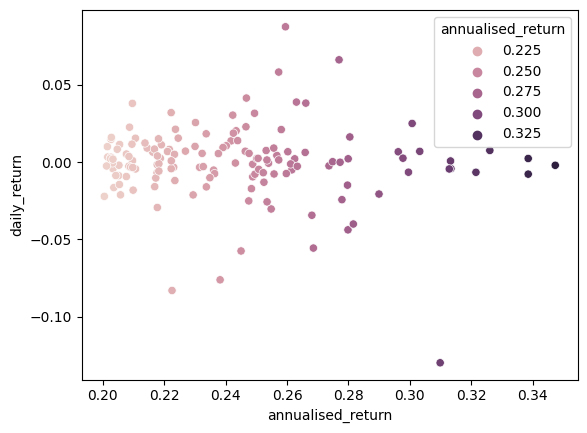

In [31]:
sns.scatterplot(highest_return,y='daily_return',x='annualised_return',hue='annualised_return')

In [32]:
highest_correction = df[df['daily_return']<-3/100]
highest_correction.info()


<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 38 to 4638
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   111 non-null    datetime64[ns]
 1   open                   111 non-null    float64       
 2   high                   111 non-null    float64       
 3   low                    111 non-null    float64       
 4   close                  111 non-null    float64       
 5   years                  111 non-null    float64       
 6   annualised_return      111 non-null    float64       
 7   daily_return           111 non-null    float64       
 8   three_month_return     111 non-null    float64       
 9   six_month_return       111 non-null    float64       
 10  nine_month_return      111 non-null    float64       
 11  twelve_month_return    111 non-null    float64       
 12  fifteen_month_return   111 non-null    float64       
 13  eighteen

<Axes: xlabel='annualised_return', ylabel='daily_return'>

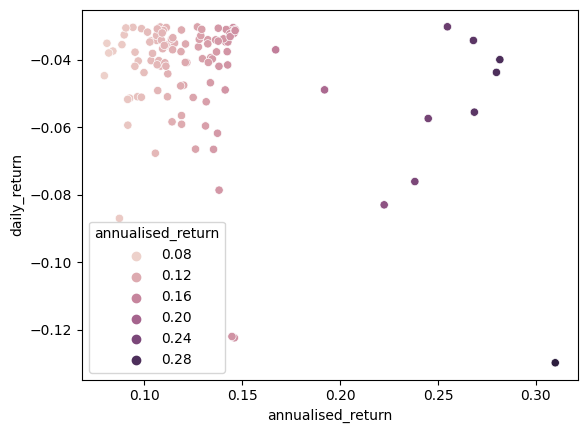

In [33]:
sns.scatterplot(highest_correction,y='daily_return',x='annualised_return',hue='annualised_return')


In [34]:

# Extract the month from the date and create a new column
df['month_of_investment'] = df['date'].dt.month

# Filter the DataFrame for rows where the investment period is about 3 years (36 months)
# Assuming 'years' column already exists
filtered_df = df[np.isclose(df['years'], 3, atol=0.25)]

# Now perform the correlation analysis
correlation_matrix = filtered_df[['month_of_investment', 'annualised_return']].corr()
print("Correlation Matrix: ", correlation_matrix)

# You can also use the Pearson correlation for a direct correlation coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(filtered_df['month_of_investment'], filtered_df['annualised_return'])
print('Pearson correlation: ', corr)


Correlation Matrix:                       month_of_investment  annualised_return
month_of_investment             1.000000          -0.837145
annualised_return              -0.837145           1.000000


ModuleNotFoundError: No module named 'scipy'

In [ ]:
plt.scatter(df['month_of_investment'], df['annualised_return'])
plt.xlabel('Month of Investment')
plt.ylabel('Annualized Return')
plt.title('Scatter Plot of Month of Investment vs Annualized Return')
plt.show()

In [ ]:
mean_returns = df.groupby('month_of_investment')['annualised_return'].mean()


In [ ]:

# Plot the mean annual return
plt.plot(mean_returns.index, mean_returns.values, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Mean Annual Return')

plt.xlabel('Month of Investment')
plt.ylabel('Annualized Return')
plt.title('Scatter Plot of Month of Investment vs Annualized Return')
plt.legend()
plt.show()

In [ ]:
 

# Filter for the specific months and years
years = [2004, 2009, 2014, 2019]
months = [2,3,4,5]  # Feb to May

filtered_df = df[df['date'].dt.year.isin(years) & df['date'].dt.month.isin(months)]

# Calculate volatility (standard deviation of closing price) for each period
volatility_by_period = {}
for year in years:
	yearly_data = filtered_df[filtered_df['date'].dt.year == year]
	volatility_by_period[year] = yearly_data['close'].std()

print(volatility_by_period)


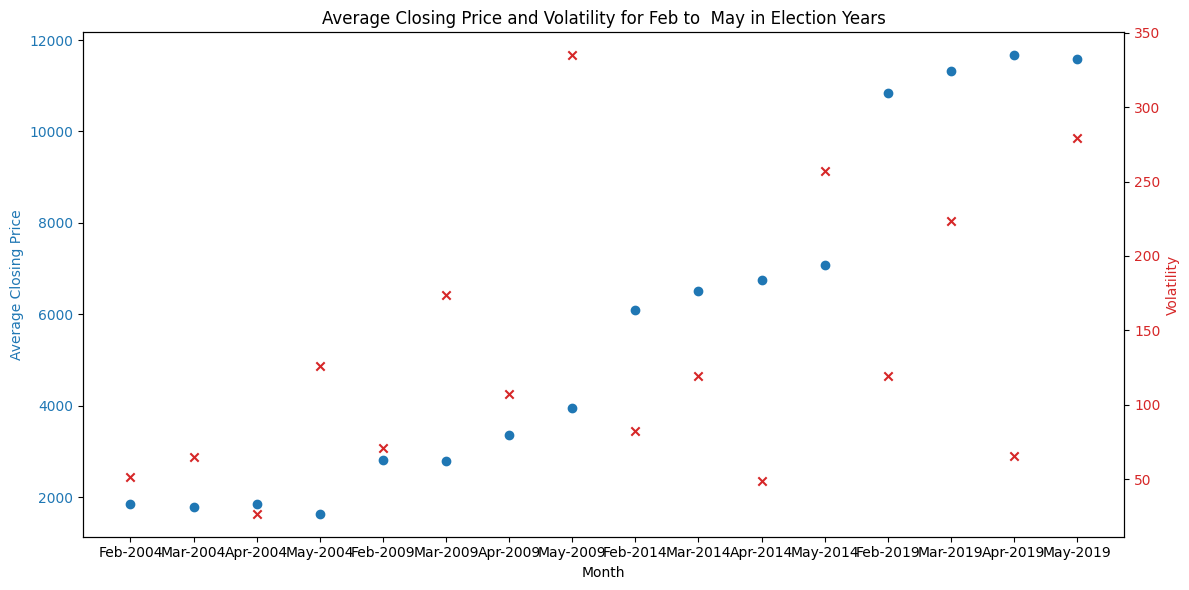

In [35]:
 # Initialize lists to store your results
average_closing_prices = []
volatilities = []
month_year_labels = []

# Loop through each year and month to calculate the average closing price and volatility
for year in years:
    
	for month in months:
		subset = df[(df['date'].dt.year == year) & (df['date'].dt.month == month)]

		if not subset.empty:
			average_closing_price = subset['close'].mean()
			volatility = subset['close'].std()
            
			average_closing_prices.append(average_closing_price)
			volatilities.append(volatility)
			month_year_labels.append(f"{pd.Timestamp(year=year, month=month, day=1).strftime('%b-%Y')}")
# Create the plot with a custom size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average closing prices on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Closing Price', color=color)
ax1.scatter(month_year_labels, average_closing_prices, color=color,marker='o', label='Avg Closing Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot volatility
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volatility', color=color)
ax2.scatter(month_year_labels, volatilities, color=color, marker='x', label='Volatility')
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Average Closing Price and Volatility for Feb to  May in Election Years')
fig.tight_layout()
plt.show()

